### 선형 회귀

##### 데이터 준비하기

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 
                        300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 
                        685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 
                        820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

##### 훈련 세트와 테스트 세트 나누기

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

##### 2차원 배열로 변환하기

In [3]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

##### 모델 훈련하기

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
# 위 훈련된 모델을 이용해 길이가 50cm인 농어의 무게 예측하기
knr.predict([[50]])

array([1033.33333333])

##### 산점도 그리기

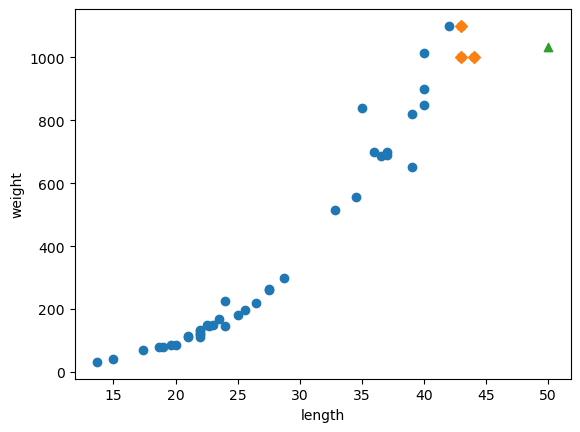

In [9]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 산점도 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련 세트 중 이웃 샘플

# 50cm 농어
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
np.mean(train_target[indexes])

1033.3333333333333

In [11]:
knr.predict([[100]])

array([1033.33333333])

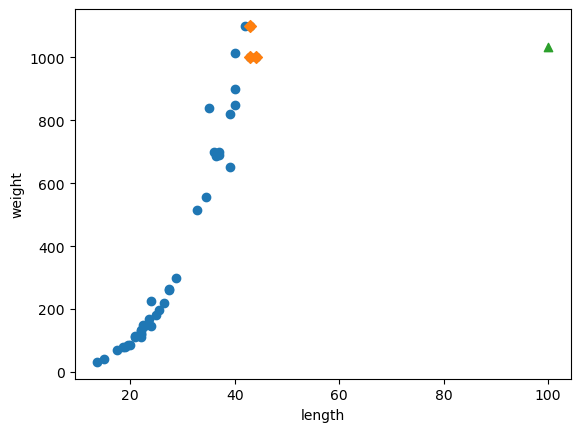

In [12]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[100]])

# 산점도 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 훈련 세트 중 이웃 샘플

# 50cm 농어
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 선형 회귀 알고리즘

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50c 농어 예측
lr.predict([[50]])

array([1241.83860323])

In [15]:
print(lr.coef_, lr.intercept_) # 기울기, 절편 출력

[39.01714496] -709.0186449535477


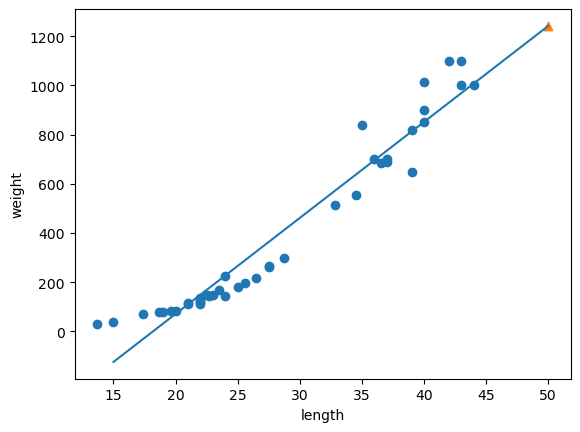

In [17]:
# 그래프 그리기

# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 1차 방정식 (15 ~ 50)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
# 결정계수 출력하기

print(lr.score(train_input, train_target)) # 훈련 세트 출력
print(lr.score(test_input, test_target)) # 테스트 세트 출력

0.9398463339976041
0.8247503123313559
